<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Выявление выбросов и аномалий (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Простой детектор аномалий на временных рядах

**z-score detector**

Гипермараметр: ширина окна.

Вычиление:
$$ z(x_t)=\left|\frac{x_t−\bar{x}_t}{s_t}\right| $$

где
$$ \bar{x}_t=(1/w)\sum_{i=t−w}^{t-1} x_i $$

$$ s_t=(1/w)\sum_{i=t−w}^{t-1} (x_i - \bar{x}_t)^2 $$

Чем выше скор - тем больше шанс того, что наблюдение аномально

Имплементируйте скор для ряда `nyc_taxi.tsv`. Когда мера работать не будет?

In [2]:
df_taxi = pd.read_csv('data/nyc_taxi.csv')

In [4]:
df_taxi = df_taxi.set_index('timestamp')

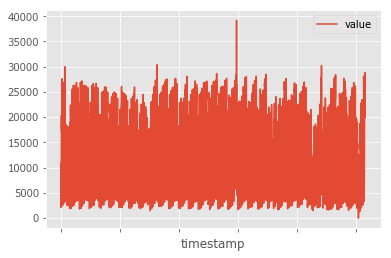

In [5]:
df_taxi.plot()

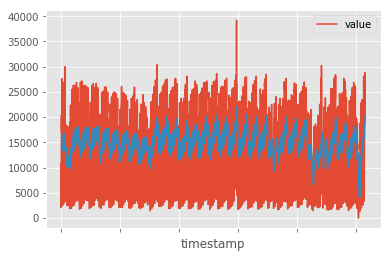

In [15]:
df_taxi.plot()
df_taxi.value.rolling(60).mean().plot()

In [25]:
w = 4
df_taxi.loc[:, 'r_mean'] = df_taxi.value.rolling(w).mean().shift(+1)
df_taxi.loc[:, 'r_std'] = df_taxi.value.rolling(w).std().shift(+1)
df_taxi.loc[:, 'z'] = abs((df_taxi.value - df_taxi.r_mean)/df_taxi.r_std)

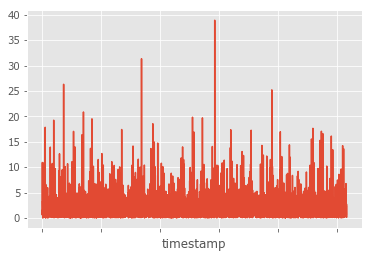

In [26]:
df_taxi.z.plot()

In [20]:
df_taxi.head(20)

,value,r_mean,r_std,z
timestamp,,,,
2014-07-01 00:00:00,10844,NaN,NaN,NaN
2014-07-01 00:30:00,8127,NaN,NaN,NaN
2014-07-01 01:00:00,6210,NaN,NaN,NaN
2014-07-01 01:30:00,4656,NaN,NaN,NaN
2014-07-01 02:00:00,3820,NaN,NaN,NaN
2014-07-01 02:30:00,2873,NaN,NaN,NaN
2014-07-01 03:00:00,2369,NaN,NaN,NaN
2014-07-01 03:30:00,2064,NaN,NaN,NaN
2014-07-01 04:00:00,2221,NaN,NaN,NaN


# Данные о диетах в разных странах

In [27]:
df_diet = pd.read_csv('data/diet.csv', sep=';').set_index('Countries').iloc[:, :-1]

In [28]:
df_diet.head()

,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),Eggs (kcal/day),...,Soyabean Oil (kcal/day),Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day)
Countries,,,,,,,,,,,,,,,,,,,,,
Albania,2860.0,96,86,425.50,813.0,49,62,11,50,22,...,2,57,193,187,191,187,174,94,1166,6
Argentina,2980.0,94,100,426.00,823.0,72,342,28,90,24,...,43,100,406,337,405,337,311,51,914,59
Australia,3120.0,107,134,371.50,1033.0,124,142,62,107,23,...,17,87,423,407,415,407,435,67,559,39
Austria,3740.0,111,162,459.50,1219.0,320,59,102,193,49,...,89,113,437,404,424,404,442,61,617,55
Bangladesh,2200.0,48,25,445.75,65.0,5,5,3,0,3,...,48,42,59,29,59,29,131,10,180,0


In [30]:
X = df_diet.values

In [32]:
X = (X - X.mean(axis=0))/X.std(axis=0)

In [33]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=7, min_samples=4)

In [39]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=1, p=None)

In [40]:
labels = dbscan.labels_

In [41]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [42]:
df_diet.loc[:, 'label'] = labels

In [44]:
df_diet.query('label == -1').T

Countries,China,Ghana,Iran,Mongolia,Saint Lucia,Samoa
Energy (kcal/day),2940.0,2650.0,360.20,2250.0,2960.00,2910.00
Protein (g/day),82.0,55.0,3090.00,79.0,95.00,84.00
Fats (g/day),90.0,38.0,83.00,84.0,81.00,133.00
Carbohydrates (g/day),450.5,522.0,61.00,294.5,462.75,344.25
Animal Products + (kcal/day),644.0,120.0,552.25,872.0,816.00,826.00
Animal Fats (kcal/day),46.0,4.0,297.00,72.0,78.00,125.00
Bovine Meat (kcal/day),27.0,6.0,49.00,159.0,35.00,39.00
"Butter, Ghee (kcal/day)",1.0,2.0,29.00,4.0,25.00,34.00
Cheese (kcal/day),1.0,0.0,49.00,5.0,54.00,2.00
Eggs (kcal/day),74.0,2.0,12.00,3.0,11.00,13.00


In [45]:
df_diet.query('label == 0').describe().T

,count,mean,std,min,25%,50%,75%,max
Energy (kcal/day),80.0,2900.6250,527.485902,1860.0,2447.50,2950.000,3342.5000,3770.0
Protein (g/day),80.0,81.7125,23.288610,32.0,59.00,83.500,100.5000,124.0
Fats (g/day),80.0,90.5750,39.645191,20.0,58.00,85.500,125.5000,170.0
Carbohydrates (g/day),80.0,439.6500,53.870840,336.0,401.25,444.125,473.3125,614.0
Animal Products + (kcal/day),80.0,597.6250,373.319776,52.0,297.50,510.500,946.5000,1340.0
Animal Fats (kcal/day),80.0,97.2875,104.277404,2.0,22.75,61.500,127.2500,453.0
Bovine Meat (kcal/day),80.0,55.5375,48.426884,2.0,23.75,46.500,78.0000,342.0
"Butter, Ghee (kcal/day)",80.0,33.7500,41.320146,0.0,4.75,15.000,55.0000,213.0
Cheese (kcal/day),80.0,54.2875,70.049023,0.0,1.00,19.000,97.7500,255.0
Eggs (kcal/day),80.0,28.5375,19.713096,1.0,10.75,24.000,44.2500,75.0


In [46]:
min_pts = 5
from sklearn.neighbors import NearestNeighbors

In [47]:
nn = NearestNeighbors(n_neighbors=min_pts)

In [48]:
nn.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [49]:
d, ind = nn.kneighbors(X)

In [52]:
d = d[:, -1]

In [53]:
d_s = np.sort(d)

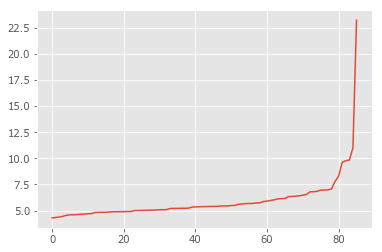

In [54]:
plt.plot(d_s)

In [55]:
from sklearn.neighbors import LocalOutlierFactor

In [63]:
lof = LocalOutlierFactor(n_neighbors=3)
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=3,
          p=2)

In [64]:
df_diet.loc[:, 'lof_score'] = lof.negative_outlier_factor_

In [65]:
df_diet.sort_values('lof_score')

,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),Eggs (kcal/day),...,Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day),label,lof_score
Countries,,,,,,,,,,,,,,,,,,,,,
Iran,360.2,3090,83,61.00,552.25,297,49,29,49,12,...,94,258,254,254,254,200,98,1468,-1,-4.447994
Samoa,2910.0,84,133,344.25,826.00,125,39,34,2,13,...,250,232,233,232,129,6,384,0,-1,-2.072782
Mongolia,2250.0,79,84,294.50,872.00,72,159,4,5,3,...,133,131,133,131,120,13,891,2,-1,-1.848410
Saint Lucia,2960.0,95,81,462.75,816.00,78,35,25,54,11,...,352,343,351,343,140,37,698,16,-1,-1.824131
Ghana,2650.0,55,38,522.00,120.00,4,6,2,0,2,...,71,70,71,70,141,24,106,0,-1,-1.776922
China,2940.0,82,90,450.50,644.00,46,27,1,1,74,...,79,73,78,73,273,168,448,1,-1,-1.451315
New Zealand,3200.0,92,118,442.50,1009.00,318,74,213,31,38,...,579,527,566,527,219,94,601,17,0,-1.339606
Argentina,2980.0,94,100,426.00,823.00,72,342,28,90,24,...,406,337,405,337,311,51,914,59,0,-1.331237
Israel,3680.0,124,149,460.75,756.00,49,115,15,103,36,...,368,355,364,355,653,124,925,1,0,-1.308110


In [66]:
from sklearn.ensemble import IsolationForest

In [67]:
iso = IsolationForest()

In [68]:
iso.fit(X)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [69]:
score = iso.decision_function(X)

In [71]:
df_diet.loc[:, 'iso_score'] = score

In [72]:
df_diet.sort_values('iso_score')

,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),Eggs (kcal/day),...,Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day),label,lof_score,iso_score
Countries,,,,,,,,,,,,,,,,,,,,,
Iran,360.2,3090,83,61.00,552.25,297,49,29,49,12,...,258,254,254,254,200,98,1468,-1,-4.447994,-0.100337
Samoa,2910.0,84,133,344.25,826.00,125,39,34,2,13,...,232,233,232,129,6,384,0,-1,-2.072782,-0.029480
Ghana,2650.0,55,38,522.00,120.00,4,6,2,0,2,...,70,71,70,141,24,106,0,-1,-1.776922,0.004158
Bangladesh,2200.0,48,25,445.75,65.00,5,5,3,0,3,...,29,59,29,131,10,180,0,0,-1.168959,0.015156
Mongolia,2250.0,79,84,294.50,872.00,72,159,4,5,3,...,131,133,131,120,13,891,2,-1,-1.848410,0.016619
Saint Lucia,2960.0,95,81,462.75,816.00,78,35,25,54,11,...,343,351,343,140,37,698,16,-1,-1.824131,0.018780
Belgium,3640.0,92,162,453.50,1120.00,404,54,119,165,45,...,488,517,488,545,124,718,54,0,-1.023523,0.027376
Brazil,3060.0,83,93,472.75,675.00,55,130,9,2,24,...,529,549,529,321,29,388,2,0,-1.165155,0.034720
New Zealand,3200.0,92,118,442.50,1009.00,318,74,213,31,38,...,527,566,527,219,94,601,17,0,-1.339606,0.036519


# Данные по фроду

Воспользуемся данными из https://www.kaggle.com/dalpozz/creditcardfraud/data

**Time** - the seconds elapsed between each transaction and the first transaction in the dataset. Numeric  
**V1** - First principle component Numeric  
**V2** - Second principle component Numeric  
**V3** - Third principle component Numeric  
...  
**V28** - Twenty-eighth principle component Numeric  
**Amount** - Transaction Amount Numeric   
**Class** - The actual classification classes Numeric  

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [ ]:
df = pd.read_csv('data/creditcard.csv.zip')

In [ ]:
df.head()

Во-первых, обратим внимание, что у нас есть шкала времение. Из-за этого может возникнуть нюансы, но мы на них пока не будем обращать внимания. Использовать Time в качестве признака, конечно-же не стоит..

Так же обратим внимание, что классы у нас очень несбалансированные. Отсюда возникает несколько вопросов:
* Какой **метод** использовать?
* Как мерить **качество**?

Насчет первого - будем использовать специализированные для этого метод - **изолирующий лес**. 

Насчет второго - одназначного ответа, увы **нет**. Давайте будем измерять несколькими способами и обсудим что в них плохо или хорошо. Кстати, в подобных задачах хочется получать не просто "вероятность" фрода, а саму разметку...

FYI можете посчитать интересную статью про меры качества в МО и из экономическую целесообразность - http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import auc, roc_curve, matthews_corrcoef, roc_auc_score
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

Среди импортированных метрик вы, возможно, встретили ранее невиданную: коэффициент корреляции Мэтьюса:
$$\text{MCC}=\frac{TP\times TN-FP\times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

По-большому счету - это просто коэффициент корреляции между двумя бинарными векторами. Но различные эмпирические исследования показали, что он хорошо себя проявляет в задачах с сильным дисбалансом классов.

## Подготовка данных

* Выделим тестовое множество, как последние 20% данных
* Выделим обучающие, тестовые и валидационные матрицы и разметки 

## Изолирующий лес

In [ ]:
iso = IsolationForest(...)

### Мониторинг работы алгоритма

Отберем несколько объектов с обоих классов для мониторинга

Разработаем следующий пайплайн:
* Будут перебираться 2 параметра - кол-во сэмплов и кол-во деревьев
* Для каждой настойки параметра будем записывать *скор* аномальности
* Попробуем прикинуть выходят ли скоры на стабильную траекторию?